<a href="https://colab.research.google.com/github/GrishmaSeries1234/My_portfolio/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABEL =["Normal","Fraud"]

In [19]:
data= pd.read_csv(path + "/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Exploratory Data analysis


In [21]:
data.isnull().values.any()

np.False_

/tmp/ipython-input-1150568962.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  c_count = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

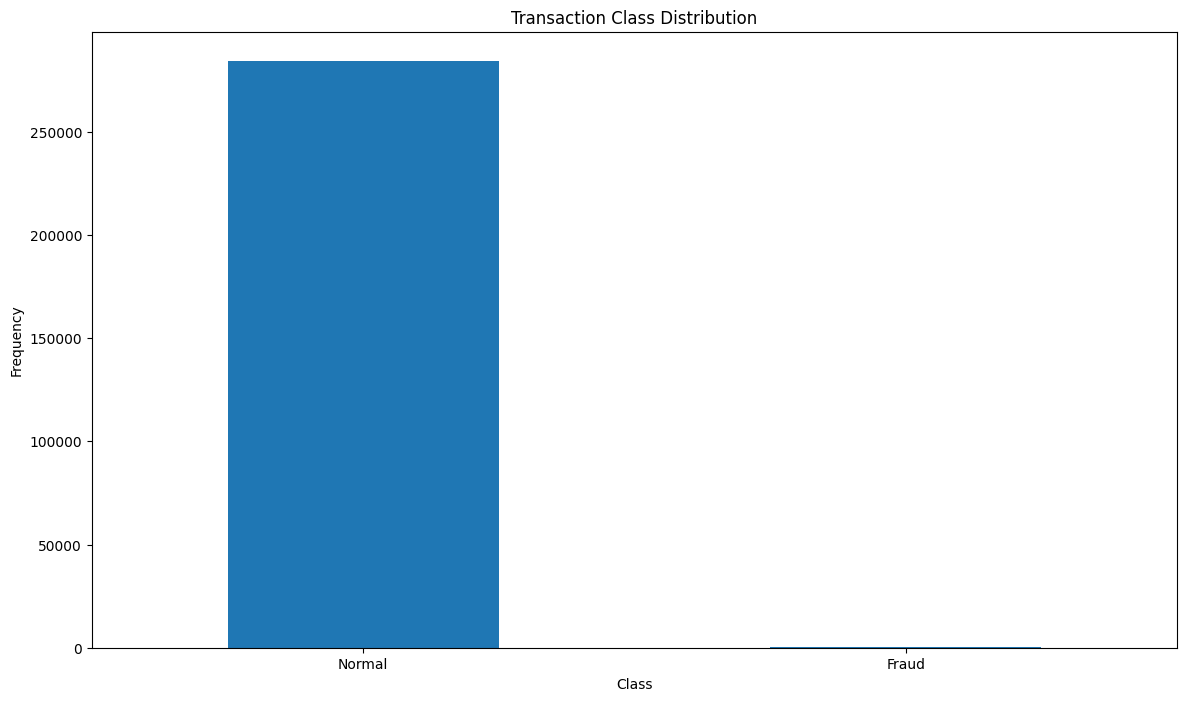

In [16]:
c_count = pd.value_counts(data['Class'], sort = True)
c_count.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),LABEL)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [24]:
#Get fraud and normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [25]:
#we need to analyziz more data from transtions
#How different transaction is done
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [26]:
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


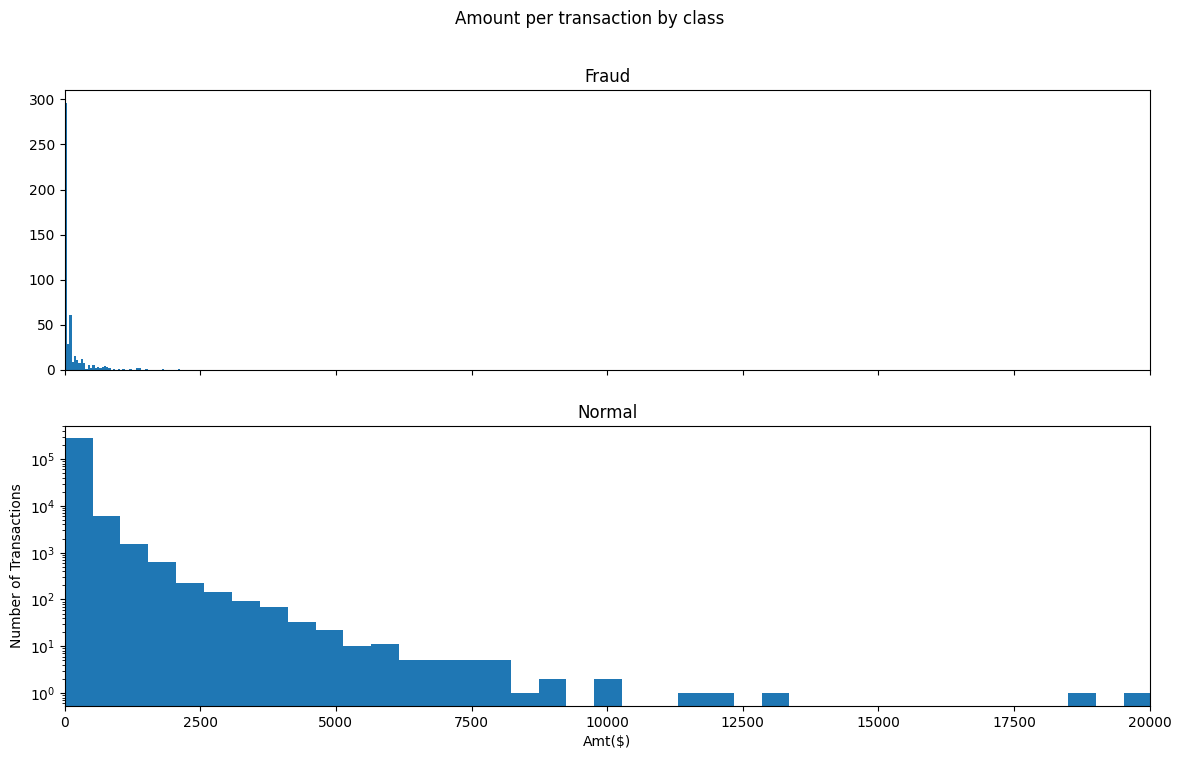

In [31]:
#using matplot lib
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amt($)')
plt.ylabel('Number of Transactions')
plt.xlim([0,20000])
plt.yscale('log')
plt.show()


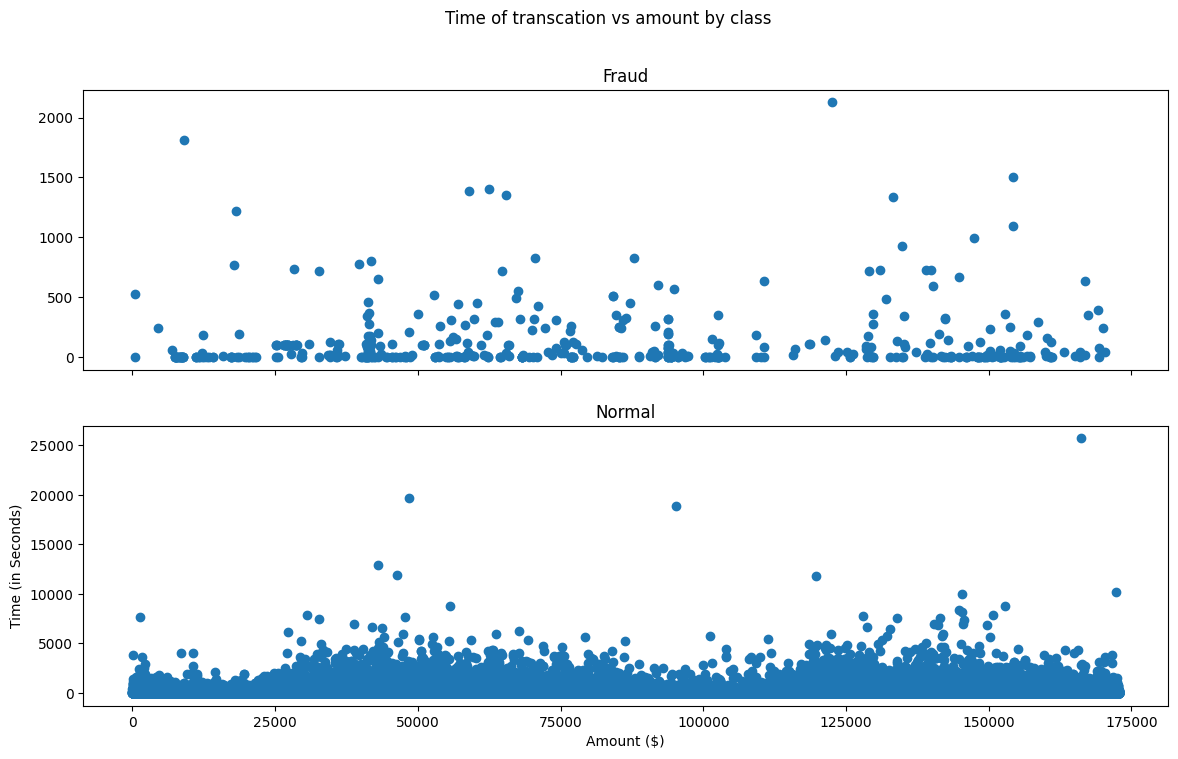

In [37]:
#we will check time of transiction and fruda in terms of times
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Time of transcation vs amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Time (in Seconds)')
plt.show()

In [39]:
#Take a small part of data
data1 = data.sample(frac=0.1,random_state=1)

In [40]:
data1.shape

(28481, 31)

In [41]:
data.shape

(284807, 31)

In [48]:
#determine number of fraud and validation transcation in the datsets
fraud = data1[data1['Class']==1]
valid = data1[data1['Class']==0]
outlier_fraction =len(fraud)/float(len(valid))

In [50]:
print(outlier_fraction)
print("Fraud Case:{}".format(len(fraud)))
print("valid Case:{}".format(len(valid)))

0.0017234102419808666
Fraud Case:49
valid Case:28432


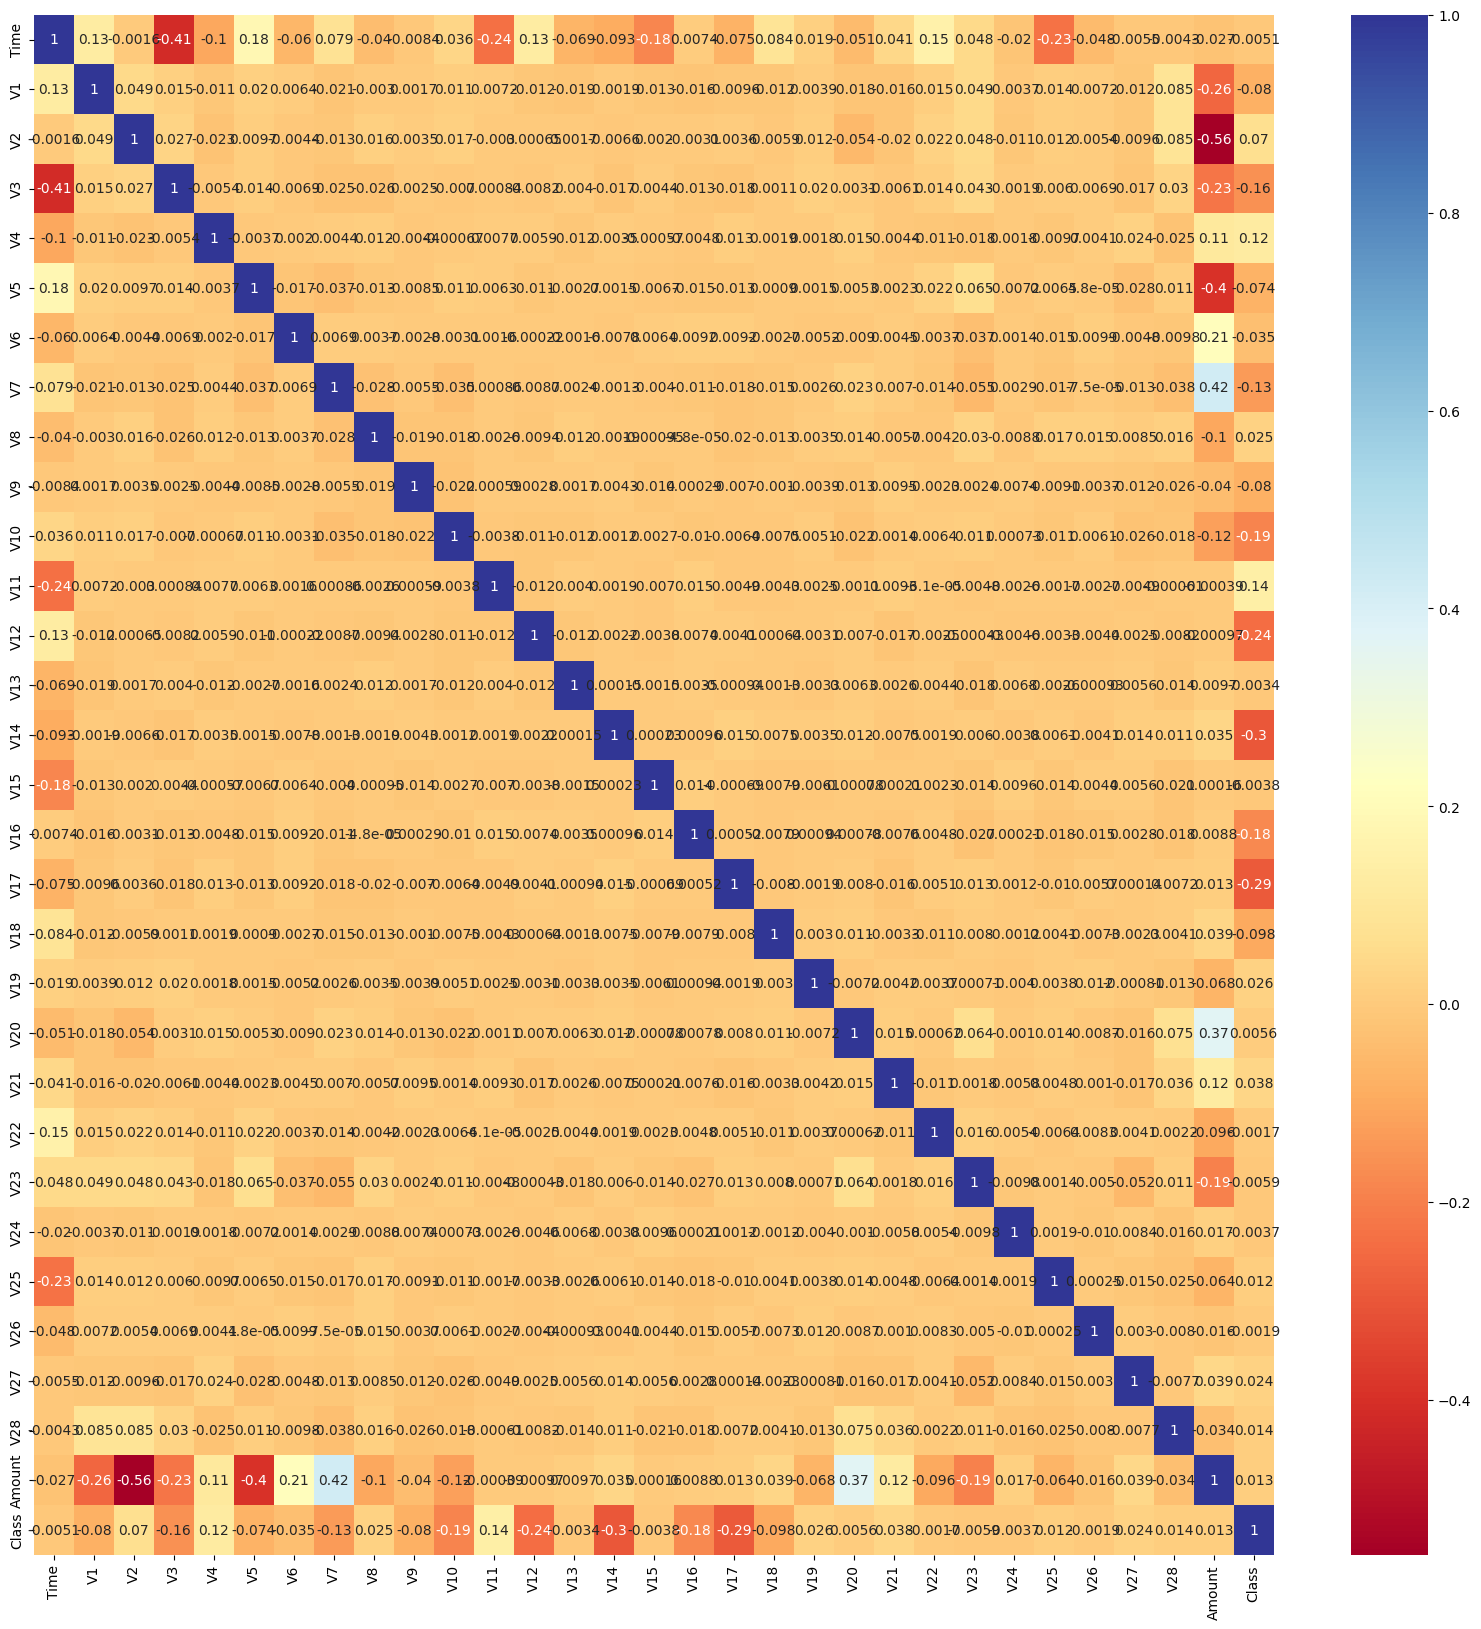

In [51]:
#correlation
import seaborn as sns
#get the correlation of each feature in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap='RdYlBu')

In [53]:
# Creating dependent and indpendent features
columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
#store variable we are predicating
Target = "Class"
#Define  random state
state = np.random.RandomState(42)
X = data1[columns]
y = data1[Target]
x_outliers = state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))
#print x & y shape
print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


In [59]:
Classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state,verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',
                                              leaf_size=30,metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel="rbf",degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [60]:
type(Classifiers)

dict

In [62]:
n_outliers = len(fraud)
for i,(clf_name,clf) in enumerate(Classifiers.items()):
  #fit the data and tag outliers
  if clf_name == "Local Outlier Factor": # Corrected typo here
    y_pred = clf.fit_predict(X)
    scores_pred = clf.negative_outlier_factor_
  elif clf_name == "Support Vector Machine":
    clf.fit(X)
    y_pred = clf.predict(X)
  else:
      clf.fit(X)
      scores_pred = clf.decision_function(X)
      y_pred = clf.predict(X)
  #Reshape the predications values to 0 for validations transcations, 1  for fraud transtions
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1
  n_errors = (y_pred != y).sum()
  #run classification  metrics
  print('{}: {}'.format(clf_name,n_errors))
  print("Accuracy Score :")
  print(accuracy_score(y,y_pred))
  print("Classification Report :")
  print(classification_report(y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   